# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv('../data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [3]:
# Your code here
websites.columns = [column.lower() for column in websites.columns]
websites.head()

,url,url_length,number_special_characters,charset,server,content_length,whois_country,whois_statepro,whois_regdate,whois_updated_date,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,7,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,61,62,129889,4586,61,4.0,0


In [4]:
# Your comment here
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   url                        1781 non-null   object 
 1   url_length                 1781 non-null   int64  
 2   number_special_characters  1781 non-null   int64  
 3   charset                    1774 non-null   object 
 4   server                     1605 non-null   object 
 5   content_length             969 non-null    float64
 6   whois_country              1475 non-null   object 
 7   whois_statepro             1419 non-null   object 
 8   whois_regdate              1654 non-null   object 
 9   whois_updated_date         1642 non-null   object 
 10  tcp_conversation_exchange  1781 non-null   int64  
 11  dist_remote_tcp_port       1781 non-null   int64  
 12  remote_ips                 1781 non-null   int64  
 13  app_bytes                  1781 non-null   int64

In [5]:
websites.shape

(1781, 21)

### Features of the websites:

url: The URL of the website.

url_length: The length of the URL.

number_special_characters: The count of special characters in the URL.

charset: The character encoding used by the website.

server: The server software used by the website.

content_length: The length of the content on the website.

whois_country: The country retrieved from WHOIS information.

whois_statepro: The state or province retrieved from WHOIS information.

whois_regdate: The registration date of the domain obtained from WHOIS information.

whois_updated_date: The last updated date of the domain obtained from WHOIS information.

tcp_conversation_exchange: Details about TCP conversation exchange.

dist_remote_tcp_port: Distance between remote TCP port.

remote_ips: Number of remote IPs.

app_bytes: Bytes transferred in the application layer.

source_app_packets: Packets sent from source application.

remote_app_packets: Packets sent from remote application.

source_app_bytes: Bytes sent from source application.

remote_app_bytes: Bytes sent from remote application.

app_packets: Total application layer packets.

dns_query_times: Number of DNS query times.

type: This column seems to be the target variable, which indicates the type of website.

In [6]:
websites.type.value_counts()
# 0 for benign and 1 for malicious.

type
0    1565
1     216
Name: count, dtype: int64

In [7]:
websites.describe().T

,count,mean,std,min,25%,50%,75%,max
url_length,1781.0,56.961258,27.555586,16.0,39.0,49.0,68.0,249.0
number_special_characters,1781.0,11.111735,4.549896,5.0,8.0,10.0,13.0,43.0
content_length,969.0,11726.927761,36391.809051,0.0,324.0,1853.0,11323.0,649263.0
tcp_conversation_exchange,1781.0,16.261089,40.500975,0.0,0.0,7.0,22.0,1194.0
dist_remote_tcp_port,1781.0,5.472768,21.807327,0.0,0.0,0.0,5.0,708.0
remote_ips,1781.0,3.060640,3.386975,0.0,0.0,2.0,5.0,17.0
app_bytes,1781.0,2982.339135,56050.574748,0.0,0.0,672.0,2328.0,2362906.0
source_app_packets,1781.0,18.540146,41.627173,0.0,0.0,8.0,26.0,1198.0
remote_app_packets,1781.0,18.746210,46.397969,0.0,0.0,9.0,25.0,1284.0
source_app_bytes,1781.0,15892.545761,69861.929888,0.0,0.0,579.0,9806.0,2060012.0


#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [8]:
df=websites.copy()

In [9]:
# correlation :
num = df.select_dtypes(include='number')
num

,url_length,number_special_characters,content_length,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type
0,16,7,263.0,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,15087.0,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,324.0,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,162.0,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,124140.0,57,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,16,NaN,0,0,0,0,0,3,186,0,0,0.0,1
1777,198,17,NaN,0,0,0,0,0,2,124,0,0,0.0,1
1778,201,34,8904.0,83,2,6,6631,87,89,132181,6945,87,4.0,0
1779,234,34,NaN,0,0,0,0,0,0,0,0,0,0.0,0


In [10]:
num_corr = num.corr().round(2)
num_corr

,url_length,number_special_characters,content_length,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type
url_length,1.00,0.92,0.13,-0.04,-0.04,-0.05,-0.03,-0.04,-0.03,-0.01,-0.03,-0.04,-0.07,0.16
number_special_characters,0.92,1.00,0.21,-0.04,-0.04,-0.05,-0.02,-0.04,-0.03,-0.01,-0.02,-0.04,-0.05,0.28
content_length,0.13,0.21,1.00,0.08,-0.00,0.00,0.05,0.07,0.09,0.10,0.05,0.07,-0.05,-0.09
tcp_conversation_exchange,-0.04,-0.04,0.08,1.00,0.56,0.33,0.46,1.00,0.99,0.87,0.46,1.00,0.35,-0.04
dist_remote_tcp_port,-0.04,-0.04,-0.00,0.56,1.00,0.21,0.78,0.56,0.59,0.31,0.78,0.56,0.26,-0.08
remote_ips,-0.05,-0.05,0.00,0.33,0.21,1.00,0.02,0.36,0.30,0.17,0.03,0.36,0.55,-0.08
app_bytes,-0.03,-0.02,0.05,0.46,0.78,0.02,1.00,0.45,0.47,0.07,1.00,0.45,0.01,-0.01
source_app_packets,-0.04,-0.04,0.07,1.00,0.56,0.36,0.45,1.00,0.99,0.86,0.45,1.00,0.41,-0.03
remote_app_packets,-0.03,-0.03,0.09,0.99,0.59,0.30,0.47,0.99,1.00,0.88,0.47,0.99,0.36,-0.03
source_app_bytes,-0.01,-0.01,0.10,0.87,0.31,0.17,0.07,0.86,0.88,1.00,0.08,0.86,0.22,-0.04


In [11]:
num.corrwith(num['type']).round(2).sort_values(ascending=False)

type                         1.00
number_special_characters    0.28
url_length                   0.16
dns_query_times              0.07
app_bytes                   -0.01
remote_app_bytes            -0.01
source_app_packets          -0.03
remote_app_packets          -0.03
app_packets                 -0.03
tcp_conversation_exchange   -0.04
source_app_bytes            -0.04
dist_remote_tcp_port        -0.08
remote_ips                  -0.08
content_length              -0.09
dtype: float64

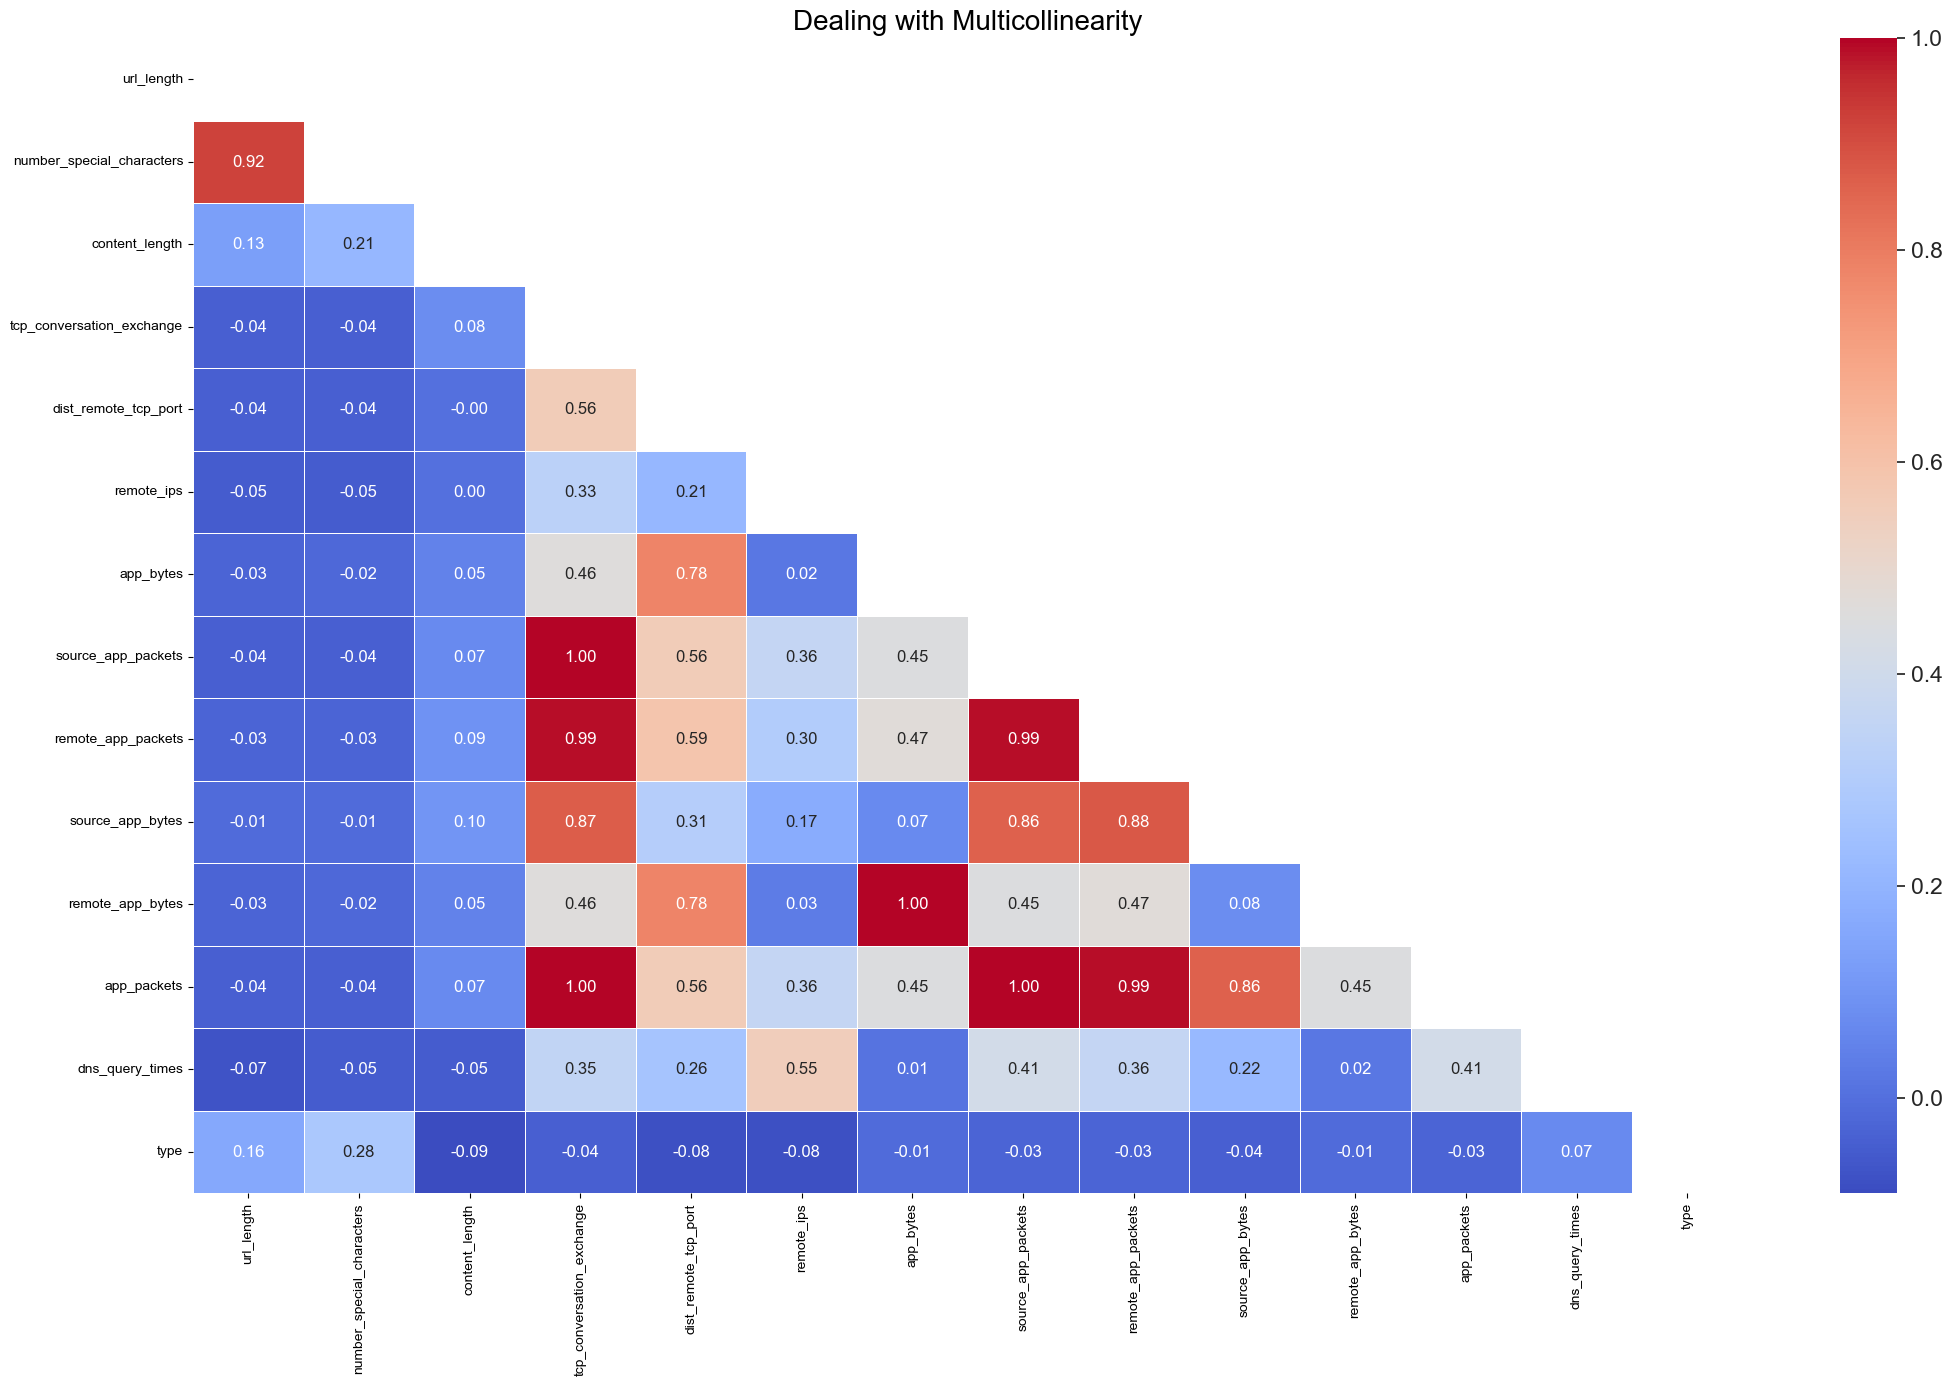

In [12]:
# Your code here
# Correlation Matrix-Heatmap Plot

mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

we can drop tcp_conversation_exchange , app_bytes ,source_app_packets

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

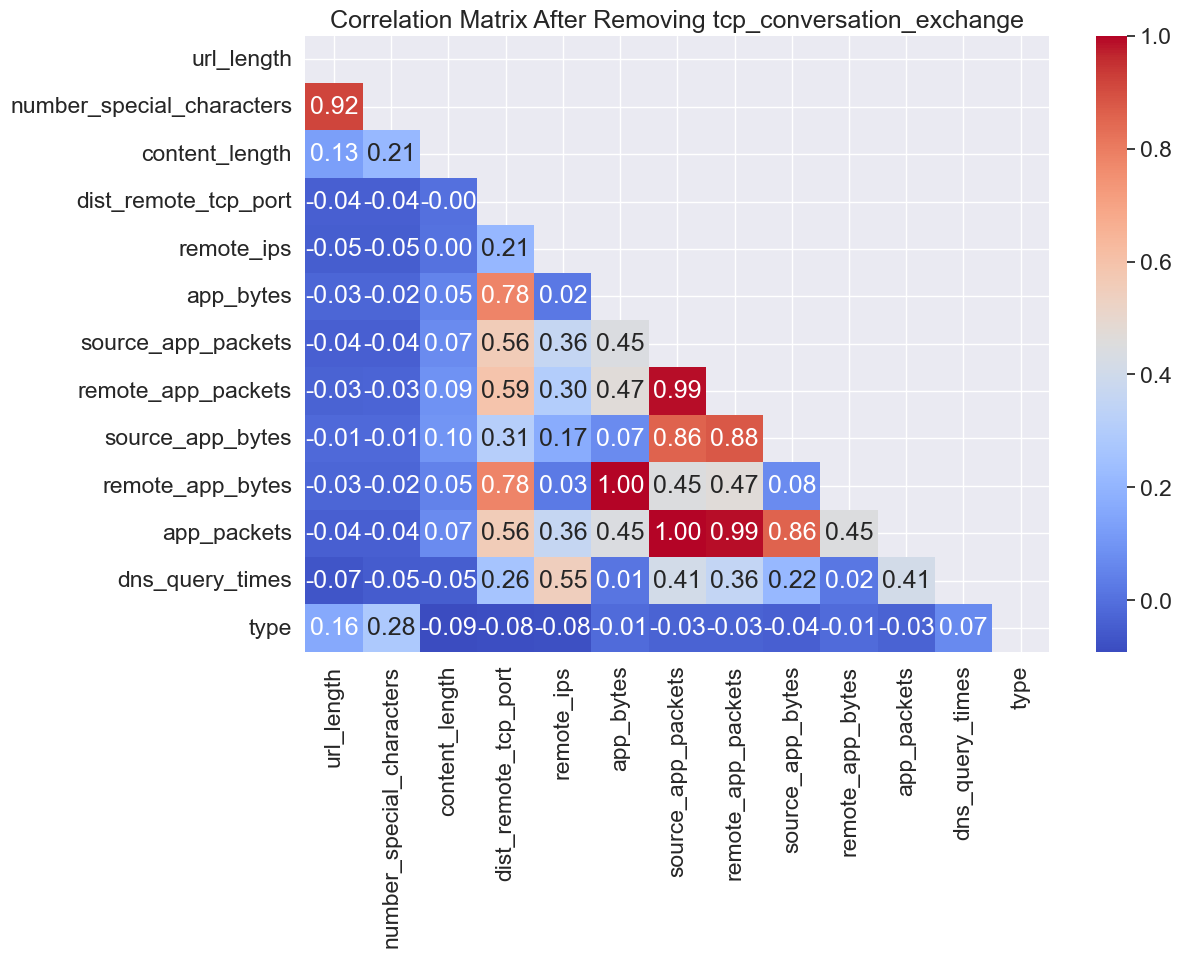

In [13]:
numeric_df = df.select_dtypes(include=['number'])

# Remove the column 'tcp_conversation_exchange'
numeric_df.drop('tcp_conversation_exchange', axis=1, inplace=True)
corr_matrix = numeric_df.corr()

# Create a mask to hide the upper triangle (including the diagonal)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create the heatmap with the mask applied
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix After Removing tcp_conversation_exchange')
plt.show()


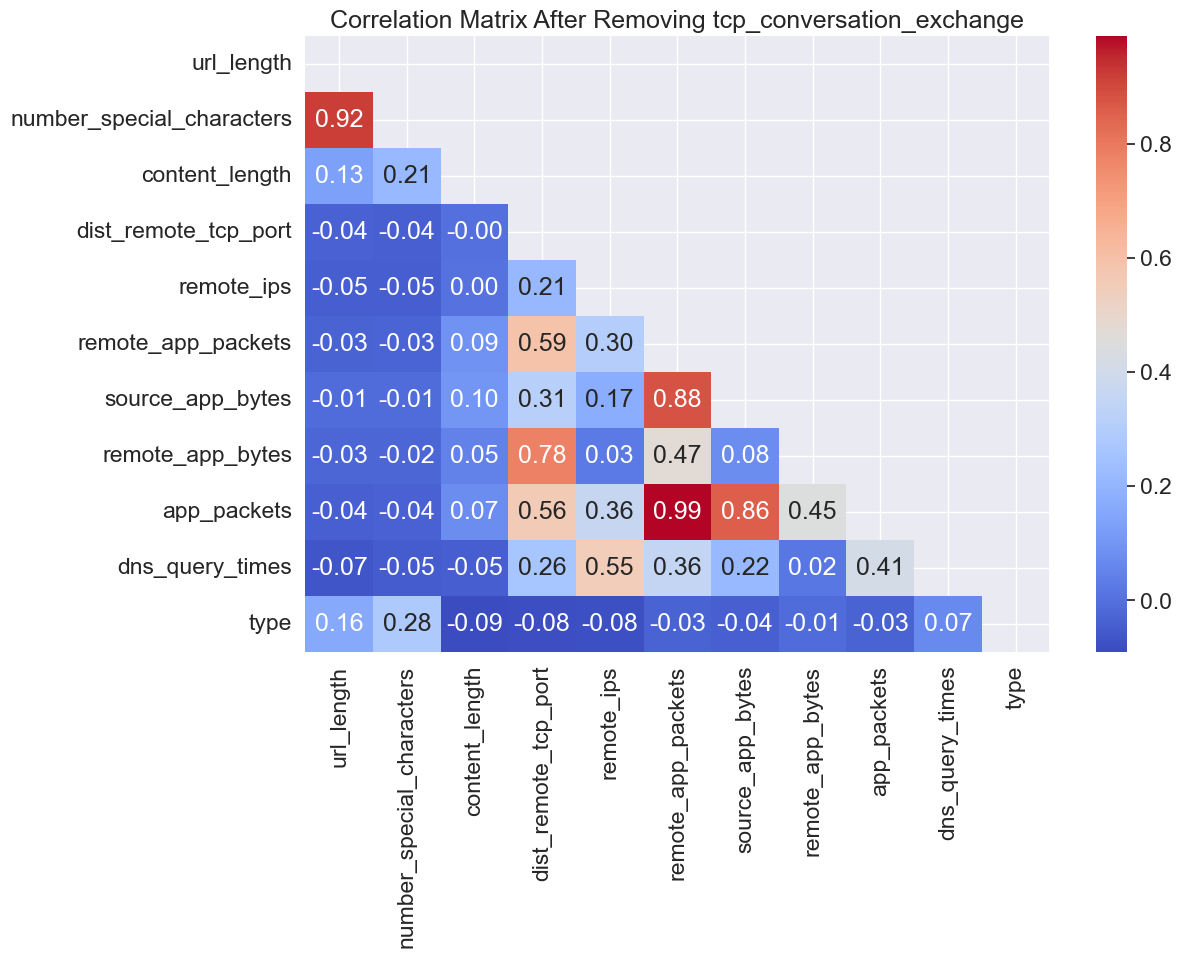

In [14]:
numeric_df = df.select_dtypes(include=['number'])

# Remove the column 'tcp_conversation_exchange'
numeric_df.drop(['tcp_conversation_exchange', 'app_bytes' , 'source_app_packets'], axis=1, inplace=True)
corr_matrix = numeric_df.corr()

# Create a mask to hide the upper triangle (including the diagonal)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create the heatmap with the mask applied
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix After Removing tcp_conversation_exchange')
plt.show()


# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [15]:
# Your code here
df.isnull().sum()

url                            0
url_length                     0
number_special_characters      0
charset                        7
server                       176
content_length               812
whois_country                306
whois_statepro               362
whois_regdate                127
whois_updated_date           139
tcp_conversation_exchange      0
dist_remote_tcp_port           0
remote_ips                     0
app_bytes                      0
source_app_packets             0
remote_app_packets             0
source_app_bytes               0
remote_app_bytes               0
app_packets                    0
dns_query_times                1
type                           0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [16]:
df.whois_regdate.value_counts()

whois_regdate
17/09/2008 0:00    62
13/01/2001 0:12    59
31/07/2000 0:00    47
15/02/2005 0:00    41
29/03/1997 0:00    33
                   ..
23/11/1994 0:00     1
30/08/2015 0:00     1
30/04/2009 0:00     1
27/11/2006 0:00     1
14/11/2008 0:00     1
Name: count, Length: 890, dtype: int64

In [17]:
df.whois_regdate.unique()

array(['10/10/2015 18:21', nan, '7/10/1997 4:00', '12/05/1996 0:00',
       '3/08/2016 14:30', '29/07/2002 0:00', '18/03/1997 0:00',
       '8/11/2014 7:41', '14/09/2007 0:00', '22/11/2016 0:00',
       '11/10/2002 0:00', '14/11/2002 0:00', '16/07/2000 0:00',
       '25/05/2013 0:00', '9/08/1999 0:00', '15/09/2013 0:00',
       '3/07/1999 0:00', '2/11/2003 0:00', '12/08/2008 22:10',
       '21/05/2009 0:00', '1/08/2002 0:00', '13/01/2005 0:00',
       '18/05/2005 19:41', '4/01/2001 0:00', '28/02/2008 10:58',
       '8/12/2006 0:00', '16/06/2000 0:00', '13/10/2000 0:00',
       '31/12/1999 0:00', '30/07/1996 0:00', '9/05/2008 0:00',
       '23/04/1999 0:00', '4/02/1997 0:00', '13/02/2003 0:00',
       '17/05/2008 0:00', '30/05/2002 0:00', '20/10/2005 0:00',
       '7/01/2006 0:00', '5/03/1996 5:00', '23/03/1995 0:00',
       '10/01/1998 0:00', '27/04/2016 0:00', '7/04/2011 0:00',
       '26/02/2009 0:00', '3/07/2002 0:00', '21/02/1995 0:00',
       '4/07/2007 0:00', '2/07/1998 0:00', '1

In [18]:
# Your code here
df.drop('content_length', axis=1 ,inplace=True)

# we can fill missing values with the most frequent value (mode)
categorical_columns = ['charset', 'server', 'whois_country', 'whois_statepro']
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Drop any remaining rows with missing values
df.dropna(subset=['whois_regdate', 'whois_updated_date', 'dns_query_times'], inplace=True)

In [19]:
df.shape

(1641, 20)

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [20]:
# Examine missing values in each column
df.isnull().sum()

url                          0
url_length                   0
number_special_characters    0
charset                      0
server                       0
whois_country                0
whois_statepro               0
whois_regdate                0
whois_updated_date           0
tcp_conversation_exchange    0
dist_remote_tcp_port         0
remote_ips                   0
app_bytes                    0
source_app_packets           0
remote_app_packets           0
source_app_bytes             0
remote_app_bytes             0
app_packets                  0
dns_query_times              0
type                         0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [21]:
# Your code here
df.whois_country.value_counts()

whois_country
US                1275
CA                  83
ES                  63
AU                  35
PA                  21
GB                  19
JP                  11
UK                  10
CN                  10
FR                   9
CZ                   9
IN                   8
NL                   6
CH                   6
KR                   5
[u'GB'; u'UK']       5
ru                   4
PH                   4
BS                   4
AT                   4
HK                   3
KY                   3
SC                   3
SE                   3
BE                   3
TR                   3
DE                   3
us                   3
IL                   2
UY                   2
Cyprus               2
RU                   2
UA                   2
KG                   2
SI                   2
NO                   2
TH                   1
se                   1
LV                   1
PK                   1
IT                   1
BY                   1
AE                  

In [22]:
df.whois_country.unique()

array(['US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN', 'LU',
       'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE', 'SI',
       'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV', 'DE',
       'ES', 'us', 'KR', 'HK', 'UA', 'CH', 'BS', 'PK', 'IT', 'Cyprus',
       'BY', 'AE', 'IE', 'UY', 'KG'], dtype=object)

In [23]:
country_mapping = {
    'Cyprus': 'CY',
    'us': 'US',
    'se': 'SE',
    'United Kingdom': 'GB',
    '[u\'GB\'; u\'UK\']': 'GB'
}
df['whois_country'].replace(country_mapping, inplace=True)
df

,url,url_length,number_special_characters,charset,server,whois_country,whois_statepro,whois_regdate,whois_updated_date,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type
3,B0_113,17,6,ISO-8859-1,nginx,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,Apache,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,61,62,129889,4586,61,4.0,0
5,B0_2064,18,7,UTF-8,nginx,SC,Mahe,3/08/2016 14:30,3/10/2016 3:45,11,6,9,894,11,13,838,894,11,0.0,0
6,B0_462,18,6,iso-8859-1,Apache/2,US,CO,29/07/2002 0:00,1/07/2016 0:00,12,0,3,1189,14,13,8559,1327,14,2.0,0
7,B0_1128,19,6,us-ascii,Microsoft-HTTPAPI/2.0,US,FL,18/03/1997 0:00,19/03/2017 0:00,0,0,0,0,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,16,UTF-8,Apache,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,0,0,3,186,0,0,0.0,1
1777,M4_41,198,17,UTF-8,Apache,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,0,0,2,124,0,0,0.0,1
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),US,FL,15/02/1999 0:00,15/07/2015 0:00,83,2,6,6631,87,89,132181,6945,87,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,US,CA,1/04/1998 0:00,9/12/2016 0:00,0,0,0,0,0,0,0,0,0,0.0,0


In [24]:
df.whois_country.value_counts()

whois_country
US    1278
CA      83
ES      63
AU      35
GB      24
PA      21
JP      11
UK      10
CN      10
FR       9
CZ       9
IN       8
NL       6
CH       6
KR       5
ru       4
PH       4
BS       4
AT       4
SE       4
HK       3
KY       3
SC       3
BE       3
TR       3
DE       3
UY       2
CY       2
RU       2
UA       2
IL       2
NO       2
SI       2
KG       2
LU       1
TH       1
LV       1
PK       1
IT       1
UG       1
BY       1
AE       1
IE       1
Name: count, dtype: int64

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

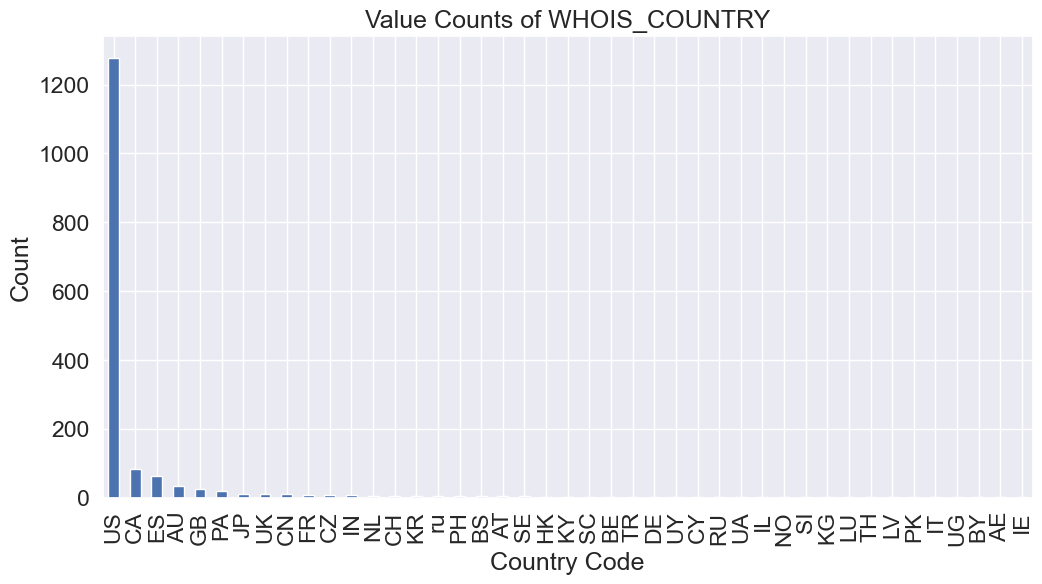

In [25]:
# Your code here
plt.figure(figsize=(12, 6))
df['whois_country'].value_counts().plot(kind='bar')
plt.title('Value Counts of WHOIS_COUNTRY')
plt.xlabel('Country Code')
plt.ylabel('Count')
plt.show()

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [26]:
# Your code here
top_10 = df.whois_country.value_counts().head(10).index
df['whois_country'] = df['whois_country'].apply(lambda x: x if x in top_10 else 'OTHER')
df['whois_country'].unique()

array(['US', 'OTHER', 'GB', 'UK', 'AU', 'CA', 'PA', 'FR', 'JP', 'CN',
       'ES'], dtype=object)

In [27]:
df.whois_country.value_counts()

whois_country
US       1278
OTHER      97
CA         83
ES         63
AU         35
GB         24
PA         21
JP         11
UK         10
CN         10
FR          9
Name: count, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [28]:
# Your code here
df.drop(['whois_statepro','whois_regdate', 'whois_updated_date'], axis=1 ,inplace=True)
df

,url,url_length,number_special_characters,charset,server,whois_country,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type
3,B0_113,17,6,ISO-8859-1,nginx,US,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,Apache,US,57,2,5,4278,61,62,129889,4586,61,4.0,0
5,B0_2064,18,7,UTF-8,nginx,OTHER,11,6,9,894,11,13,838,894,11,0.0,0
6,B0_462,18,6,iso-8859-1,Apache/2,US,12,0,3,1189,14,13,8559,1327,14,2.0,0
7,B0_1128,19,6,us-ascii,Microsoft-HTTPAPI/2.0,US,0,0,0,0,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,16,UTF-8,Apache,ES,0,0,0,0,0,3,186,0,0,0.0,1
1777,M4_41,198,17,UTF-8,Apache,ES,0,0,0,0,0,2,124,0,0,0.0,1
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),US,83,2,6,6631,87,89,132181,6945,87,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,US,0,0,0,0,0,0,0,0,0,0.0,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1641 entries, 3 to 1780
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   url                        1641 non-null   object 
 1   url_length                 1641 non-null   int64  
 2   number_special_characters  1641 non-null   int64  
 3   charset                    1641 non-null   object 
 4   server                     1641 non-null   object 
 5   whois_country              1641 non-null   object 
 6   tcp_conversation_exchange  1641 non-null   int64  
 7   dist_remote_tcp_port       1641 non-null   int64  
 8   remote_ips                 1641 non-null   int64  
 9   app_bytes                  1641 non-null   int64  
 10  source_app_packets         1641 non-null   int64  
 11  remote_app_packets         1641 non-null   int64  
 12  source_app_bytes           1641 non-null   int64  
 13  remote_app_bytes           1641 non-null   int64  
 1

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [30]:
# Your code here
df.dtypes

url                           object
url_length                     int64
number_special_characters      int64
charset                       object
server                        object
whois_country                 object
tcp_conversation_exchange      int64
dist_remote_tcp_port           int64
remote_ips                     int64
app_bytes                      int64
source_app_packets             int64
remote_app_packets             int64
source_app_bytes               int64
remote_app_bytes               int64
app_packets                    int64
dns_query_times              float64
type                           int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [31]:
# Your code here
df.drop('url', axis=1 ,inplace=True)
df

,url_length,number_special_characters,charset,server,whois_country,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type
3,17,6,ISO-8859-1,nginx,US,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,UTF-8,Apache,US,57,2,5,4278,61,62,129889,4586,61,4.0,0
5,18,7,UTF-8,nginx,OTHER,11,6,9,894,11,13,838,894,11,0.0,0
6,18,6,iso-8859-1,Apache/2,US,12,0,3,1189,14,13,8559,1327,14,2.0,0
7,19,6,us-ascii,Microsoft-HTTPAPI/2.0,US,0,0,0,0,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,16,UTF-8,Apache,ES,0,0,0,0,0,3,186,0,0,0.0,1
1777,198,17,UTF-8,Apache,ES,0,0,0,0,0,2,124,0,0,0.0,1
1778,201,34,utf-8,Apache/2.2.16 (Debian),US,83,2,6,6631,87,89,132181,6945,87,4.0,0
1779,234,34,ISO-8859-1,cloudflare-nginx,US,0,0,0,0,0,0,0,0,0,0.0,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1641 entries, 3 to 1780
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   url_length                 1641 non-null   int64  
 1   number_special_characters  1641 non-null   int64  
 2   charset                    1641 non-null   object 
 3   server                     1641 non-null   object 
 4   whois_country              1641 non-null   object 
 5   tcp_conversation_exchange  1641 non-null   int64  
 6   dist_remote_tcp_port       1641 non-null   int64  
 7   remote_ips                 1641 non-null   int64  
 8   app_bytes                  1641 non-null   int64  
 9   source_app_packets         1641 non-null   int64  
 10  remote_app_packets         1641 non-null   int64  
 11  source_app_bytes           1641 non-null   int64  
 12  remote_app_bytes           1641 non-null   int64  
 13  app_packets                1641 non-null   int64  
 1

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [33]:
# Your code here
df.charset.value_counts()

charset
UTF-8           612
ISO-8859-1      408
utf-8           357
us-ascii        144
iso-8859-1      117
windows-1251      1
ISO-8859          1
windows-1252      1
Name: count, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [34]:
# Your code here
df.server.value_counts().head(3)


server
Apache                   527
nginx                    160
Microsoft-HTTPAPI/2.0    103
Name: count, dtype: int64

![Think Hard](../images/think-hard.jpg)

We do the top values of server and the rest er class it on Other.

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [35]:
# Your code here
top_3_server = df.server.value_counts().head(3).index
df['server'] = df['server'].apply(lambda x: x if x in top_3_server else 'OTHER')
df['server'].unique()

array(['nginx', 'Apache', 'OTHER', 'Microsoft-HTTPAPI/2.0'], dtype=object)

In [36]:
# Count `SERVER` value counts here
df.server.value_counts()

server
OTHER                    851
Apache                   527
nginx                    160
Microsoft-HTTPAPI/2.0    103
Name: count, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Also, assign the data with dummy values to a new variable `website_dummy`.**

In [37]:
# Your code here
website_dummy=pd.get_dummies(df)
website_dummy

,url_length,number_special_characters,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type,charset_ISO-8859,charset_ISO-8859-1,charset_UTF-8,charset_iso-8859-1,charset_us-ascii,charset_utf-8,charset_windows-1251,charset_windows-1252,server_Apache,server_Microsoft-HTTPAPI/2.0,server_OTHER,server_nginx,whois_country_AU,whois_country_CA,whois_country_CN,whois_country_ES,whois_country_FR,whois_country_GB,whois_country_JP,whois_country_OTHER,whois_country_PA,whois_country_UK,whois_country_US
3,17,6,31,22,3,3812,39,37,18784,4380,39,8.0,0,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
4,17,6,57,2,5,4278,61,62,129889,4586,61,4.0,0,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
5,18,7,11,6,9,894,11,13,838,894,11,0.0,0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
6,18,6,12,0,3,1189,14,13,8559,1327,14,2.0,0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
7,19,6,0,0,0,0,0,0,0,0,0,0.0,0,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,16,0,0,0,0,0,3,186,0,0,0.0,1,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1777,198,17,0,0,0,0,0,2,124,0,0,0.0,1,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1778,201,34,83,2,6,6631,87,89,132181,6945,87,4.0,0,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
1779,234,34,0,0,0,0,0,0,0,0,0,0.0,0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [38]:
# Your code here
website_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1641 entries, 3 to 1780
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   url_length                    1641 non-null   int64  
 1   number_special_characters     1641 non-null   int64  
 2   tcp_conversation_exchange     1641 non-null   int64  
 3   dist_remote_tcp_port          1641 non-null   int64  
 4   remote_ips                    1641 non-null   int64  
 5   app_bytes                     1641 non-null   int64  
 6   source_app_packets            1641 non-null   int64  
 7   remote_app_packets            1641 non-null   int64  
 8   source_app_bytes              1641 non-null   int64  
 9   remote_app_bytes              1641 non-null   int64  
 10  app_packets                   1641 non-null   int64  
 11  dns_query_times               1641 non-null   float64
 12  type                          1641 non-null   int64  
 13  charset_

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [40]:
from sklearn.model_selection import train_test_split

# Your code here:
X = website_dummy.drop('type', axis=1) 
y = website_dummy['type']  

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print(f'100% of our data: {len(df)}.')
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

100% of our data: 1641.
Shape of X_train: (1312, 35)
Shape of X_test: (329, 35)
Shape of y_train: (1312,)
Shape of y_test: (329,)


#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [41]:
# Your code here:
from sklearn.linear_model import LogisticRegression


Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [42]:
# Your code here:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [43]:
# Your code here:
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report 
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions)

In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       297
           1       0.00      0.00      0.00        32

    accuracy                           0.90       329
   macro avg       0.45      0.50      0.47       329
weighted avg       0.81      0.90      0.86       329



<Figure size 800x600 with 0 Axes>

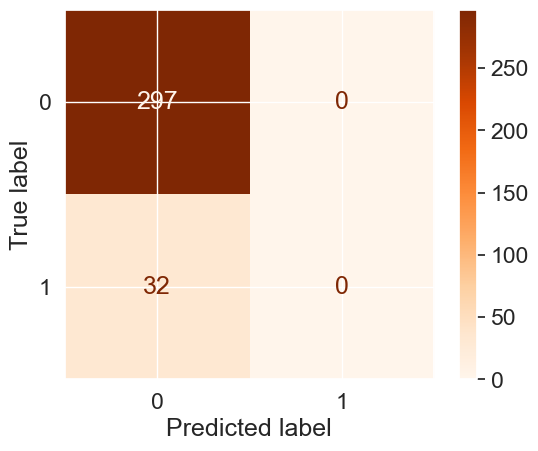

In [45]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')  
plt.grid(True)
plt.show()

In [46]:
print("Test data accuracy: ",model.score(X_test,y_test))
print("Train data accuracy: ", model.score(X_train, y_train))

Test data accuracy:  0.9027355623100304
Train data accuracy:  0.9039634146341463


What are your thoughts on the performance of the model? Write your conclusions below.


the model seems to perform consistently well with an accuracy of around 90% on both the test and train data


#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [47]:
# Your code here:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

<Figure size 800x600 with 0 Axes>

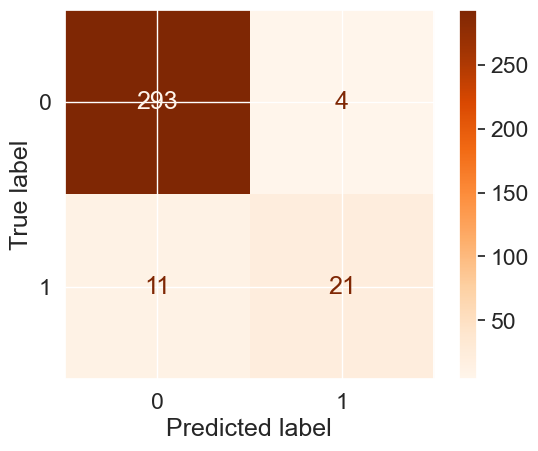

In [48]:
# Your code here:
predictions= model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')  
plt.grid(True)
plt.show()

In [49]:
print("Test data accuracy: ",model.score(X_test,y_test))
print("Train data accuracy: ", model.score(X_train, y_train))

Test data accuracy:  0.9544072948328267
Train data accuracy:  0.9672256097560976


#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [50]:
# Your code here:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

<Figure size 800x600 with 0 Axes>

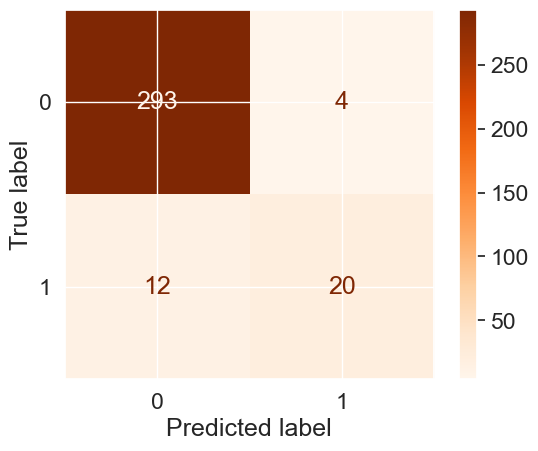

In [54]:

predictions=model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')  
plt.grid(True)
plt.show()

In [53]:
print("Test data accuracy: ",model.score(X_test,y_test))
print("Train data accuracy: ", model.score(X_train, y_train))

Test data accuracy:  0.9513677811550152
Train data accuracy:  0.9634146341463414


there's any important improvemente when increasing k to 5

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [ ]:
# Your code here